In [1]:
from pylab import *
%run "mis_int.ipynb"
%matplotlib inline

Hay que resolver
$$\frac{d\rho²}{dr²}=-\frac{\hat\rho}{\rho²}$$

In [2]:
def mov_planeta(x,t):
    r3=(x[0]**2 + x[1]**2)**(1.5)
    drx= x[2]
    dry= x[3]
    dvrx= -x[0]/r3
    dvry= -x[1]/r3
    return array([drx, dry, dvrx, dvry])

def J_mov_planeta(x,t):
    d_ec = array([0,0,0,0])
    r5  = (x[0]**2 + x[1]**2)**(2.5)
    rxmry = (2*x[0]*x[0]-x[1]*x[1])/r5
    rymrx = (2*x[1]*x[1]-x[0]*x[0])/r5
    rxry=(3*x[0]*x[1])/r5
    Jac = array([[0,0,1,0],[0,0,0,1],[rxmry,rxry,0,0],[rxry,rymrx,0,0]])
    return d_ec,Jac

CON RUNGE KUTTA DE 2° ORDEN

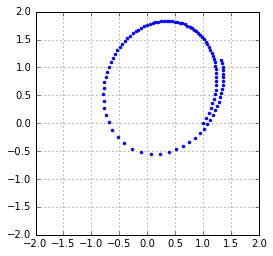

CPU times: user 264 ms, sys: 4 ms, total: 268 ms
Wall time: 1 s


In [3]:
%%time
t,r_vr = rk2(mov_planeta,[1,0,.6,.9],[0,10],0.1)
zoom = 2
xlim([-zoom,zoom]),ylim([-zoom,zoom])
axes().set_aspect('equal'),grid(True)
plot(r_vr[:,0],r_vr[:,1],'.')
show()

CON EL JACOBIANO


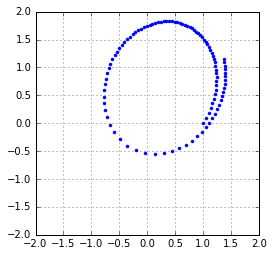

CPU times: user 248 ms, sys: 0 ns, total: 248 ms
Wall time: 244 ms


In [4]:
%%time
t,r_vr = integra2(mov_planeta,J_mov_planeta,[1,0,.6,.9],[0,10],0.1)
zoom = 2
xlim([-zoom,zoom]),ylim([-zoom,zoom])
axes().set_aspect('equal'),grid(True)
plot(r_vr[:,0],r_vr[:,1],'.')
show()

RUNGE KUTTA 4°ORDEN 

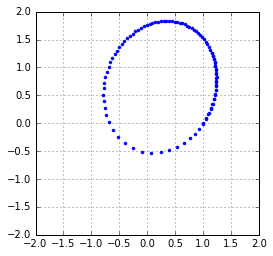

CPU times: user 244 ms, sys: 4 ms, total: 248 ms
Wall time: 247 ms


In [5]:
%%time
t,r_vr = rk4(mov_planeta,[1,0,.6,.9],[0,10],0.1)
zoom = 2
xlim([-zoom,zoom]),ylim([-zoom,zoom])
axes().set_aspect('equal'),grid(True)
plot(r_vr[:,0],r_vr[:,1],'.')
show()

In [6]:
from scipy.integrate import *

In [7]:
h=0.1
tiempos = arange(0,10+h,h)

In [8]:
sol=odeint(mov_planeta,[1,0,.6,.9],tiempos)

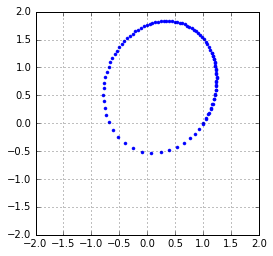

CPU times: user 248 ms, sys: 8 ms, total: 256 ms
Wall time: 253 ms


In [9]:
%%time
r_vr = odeint(mov_planeta,[1,0,.6,.9],tiempos)
zoom = 2
xlim([-zoom,zoom]),ylim([-zoom,zoom])
axes().set_aspect('equal'),grid(True)
plot(r_vr[:,0],r_vr[:,1],'.')
show()

EL PLANO FASE

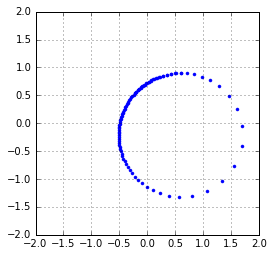

In [10]:
zoom = 2
xlim([-zoom,zoom]),ylim([-zoom,zoom])
axes().set_aspect('equal'),grid(True)
plot(r_vr[:,2],r_vr[:,3],'.')
show()